# Завдання 1

In [158]:
# Налаштування диску і ноутбука
import pandas as pd
from google.colab import drive
from google.colab import data_table

drive.mount('/content/drive')

data_table.disable_dataframe_formatter()

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Завантаження і аналіз df_2d
df_2d = pd.read_csv('/content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw09_data/data/data_2d.csv', header=None)

print(df_2d.info())
print(df_2d.head())
for i in range(df_2d.shape[1]):
    print(len(df_2d[i].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
None
     0         1         2
0  0.0 -0.768716  0.460860
1  0.0  2.687848  2.366961
2  0.0 -0.201379  0.470430
3  0.0  0.608496  1.225400
4  0.0 -0.082282  1.137218
2
200
200


In [82]:
# Завантаження і аналіз df_mnist
df_mnist = pd.read_csv('/content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw09_data/data/mnist.csv', header=None)

print(df_mnist.info())
print(len(df_mnist.iloc[:, 0].unique()), len(df_mnist.iloc[:, -1].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 3.0 MB
None
10 1


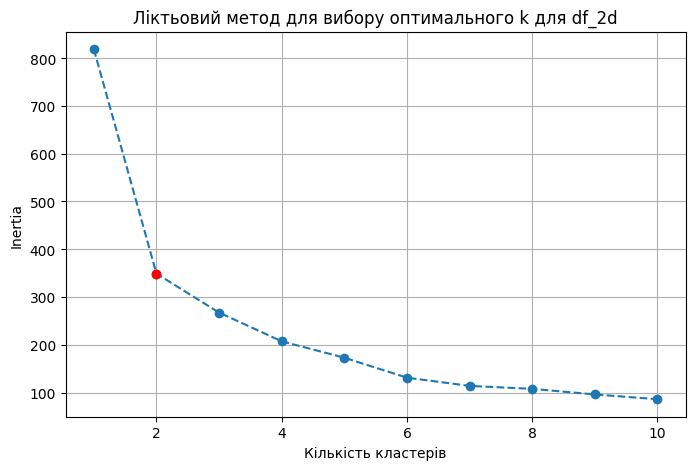

In [84]:
# Ліктьовий метод для df_2d
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_2d = df_2d.iloc[:, 1:].values

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_2d)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.plot(k_values[1], inertia_values[1], 'ro')
plt.title('Ліктьовий метод для вибору оптимального k для df_2d')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

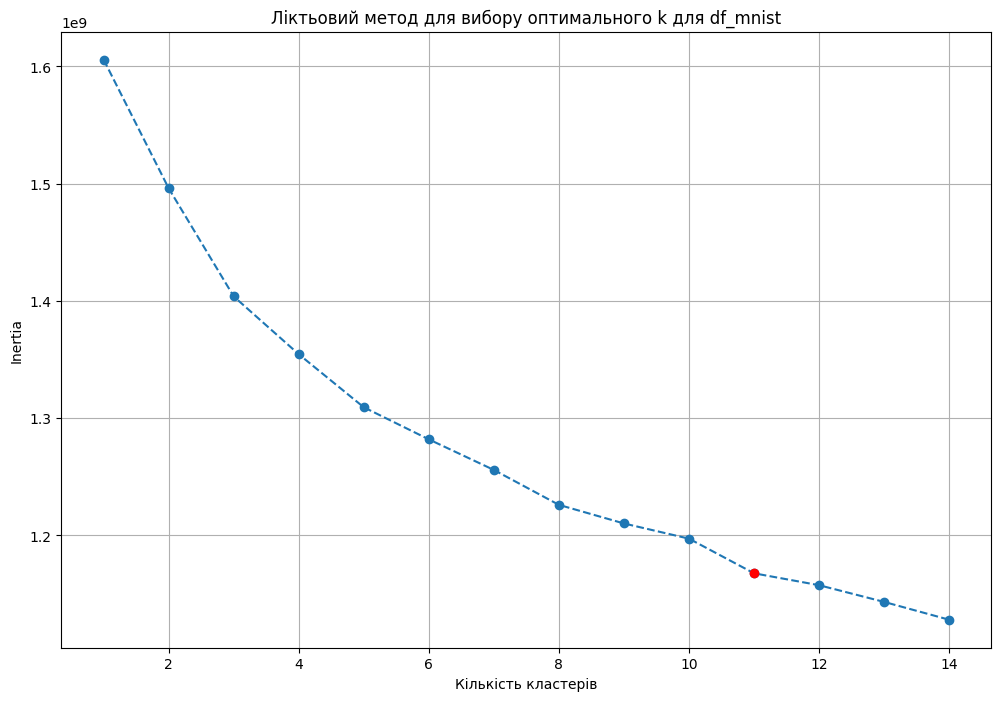

In [85]:
# Ліктьовий метод для df_mnist
X = df_mnist.iloc[:, 1:].values

inertia_values = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.plot(k_values[10], inertia_values[10], 'ro')
plt.title('Ліктьовий метод для вибору оптимального k для df_mnist')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [95]:
# Kmeans для df_2d
kmeans_2d = KMeans(n_clusters=2, random_state=42)
y_kmeans_2d = kmeans_2d.fit_predict(X_2d)

In [70]:
# Kmeans для df_mnist
kmeans = KMeans(n_clusters=11, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Завдання 2

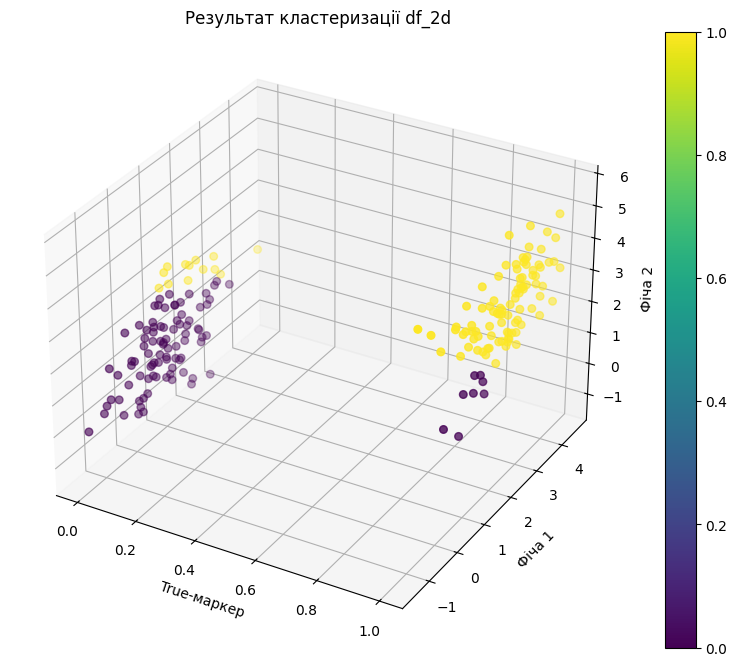

In [88]:
# Порівняння кластеризації Kmeans і маркерів даних для df_2d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_2d[0], df_2d[1], df_2d[2], c=y_kmeans_2d, cmap='viridis', s=30, marker='o')

ax.set_xlabel('True-маркер')
ax.set_ylabel('Фіча 1')
ax.set_zlabel('Фіча 2')

ax.set_title('Результат кластеризації df_2d')
plt.colorbar(scatter)
plt.show()

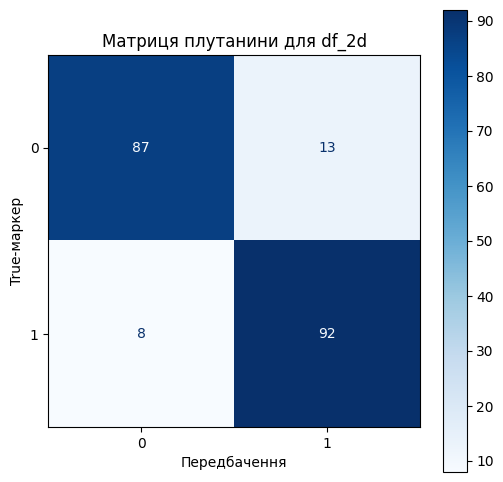

In [124]:
# Матриця плутанини для df_2d: передбачення Kmeans і маркери даних
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df_2d.iloc[:, 0], y_kmeans_2d)
fig, ax = plt.subplots(figsize=(6, 6))
class_names = ['0', '1']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='.0f', ax=ax)

ax.set_xlabel('Передбачення')
ax.set_ylabel('True-маркер')
ax.set_title("Матриця плутанини для df_2d")
plt.show()

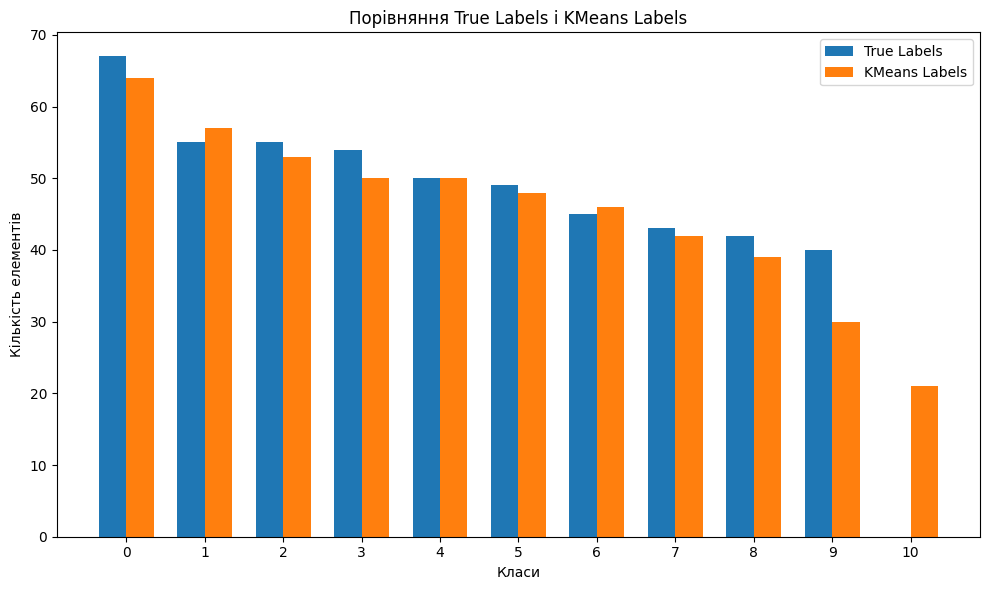

In [157]:
# Порівняння кластеризації Kmeans і маркерів даних для df_mnist
import numpy as np

true_labels = sorted(df_mnist.iloc[:, 0].value_counts().values, reverse=True)
true_labels.append(0)

kmeans_labels = y_kmeans
_, counts = np.unique(kmeans_labels, return_counts=True)
kmeans_labels = sorted(counts.tolist(), reverse=True)

labels = [str(i) for i in range(11)]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, true_labels, width, label='True Labels')
ax.bar(x + width/2, kmeans_labels, width, label='KMeans Labels')

ax.set_xlabel('Класи')
ax.set_ylabel('Кількість елементів')
ax.set_title('Порівняння True Labels і KMeans Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [146]:
# PCA  для df_mnist
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

(500, 2)


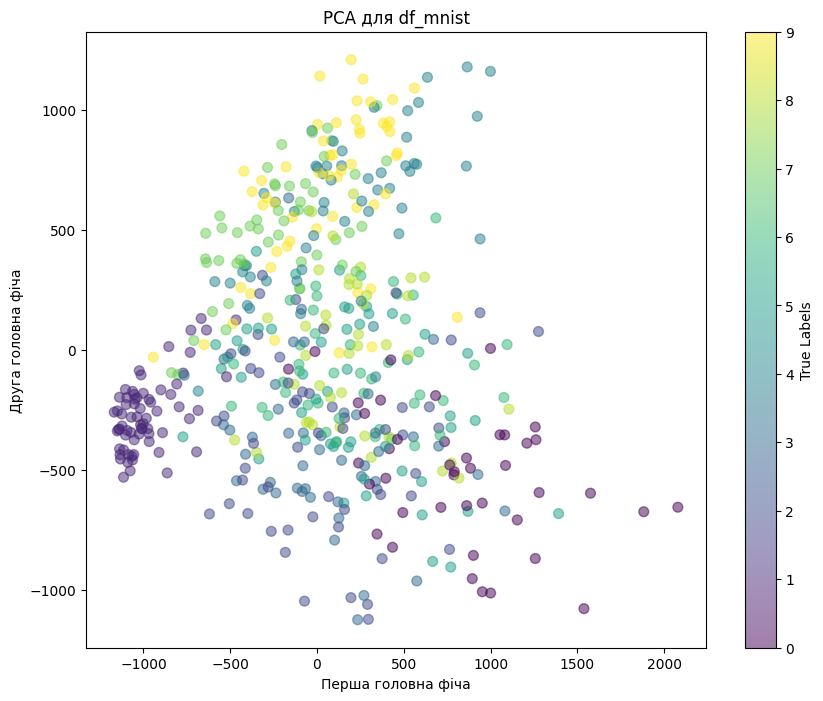

In [147]:
# Візуалізація результатів PCA з маркерами даних
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_mnist.iloc[:, 0], cmap='viridis', s=50, alpha=0.5)

plt.colorbar(label='True Labels')
plt.title('PCA для df_mnist')
plt.xlabel('Перша головна фіча')
plt.ylabel('Друга головна фіча')

plt.show()

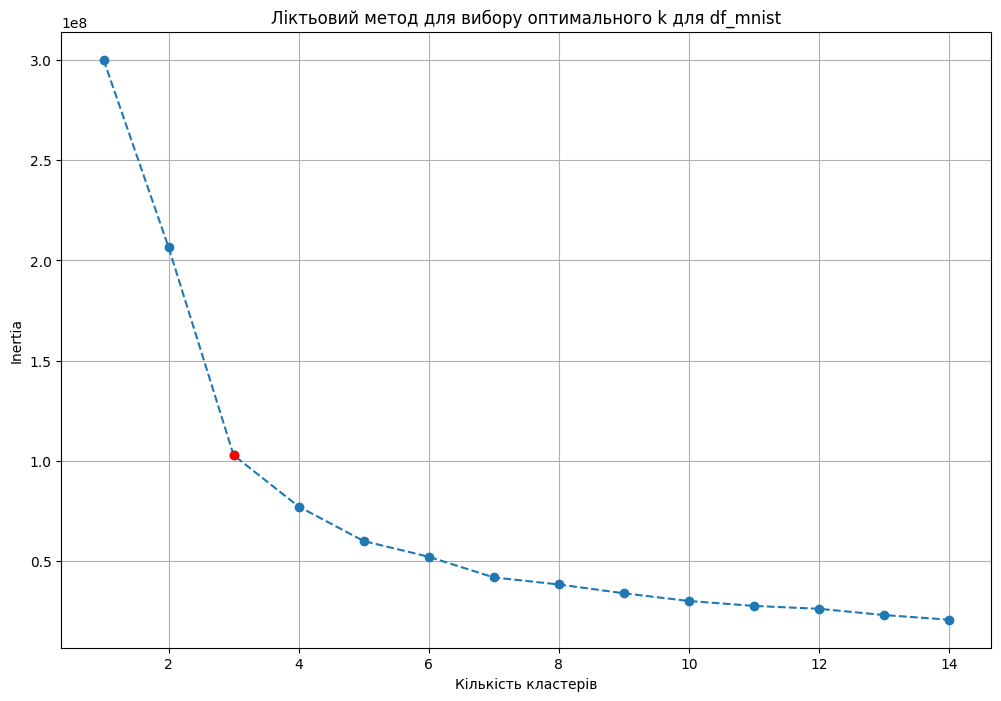

In [148]:
# Ліктьовий метод для df_mnist після PCA
inertia_values = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.plot(k_values[2], inertia_values[2], 'ro')
plt.title('Ліктьовий метод для вибору оптимального k для df_mnist')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [153]:
# Kmeans з PCA
kmeans_PCA = KMeans(n_clusters=3, random_state=42)
y_kmeans_PCA = kmeans_PCA.fit_predict(X_pca)

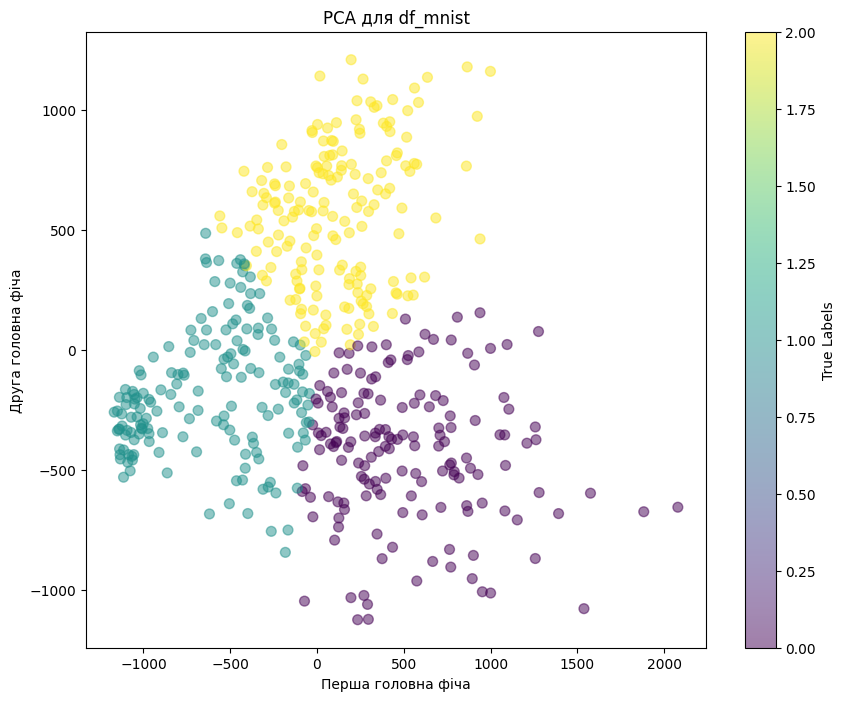

[0 1 2]


In [154]:
# Результати кластеризації Kmeans з PCA для df_mnist
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_PCA, cmap='viridis', s=50, alpha=0.5)

plt.colorbar(label='True Labels')
plt.title('PCA для df_mnist')
plt.xlabel('Перша головна фіча')
plt.ylabel('Друга головна фіча')

plt.show()

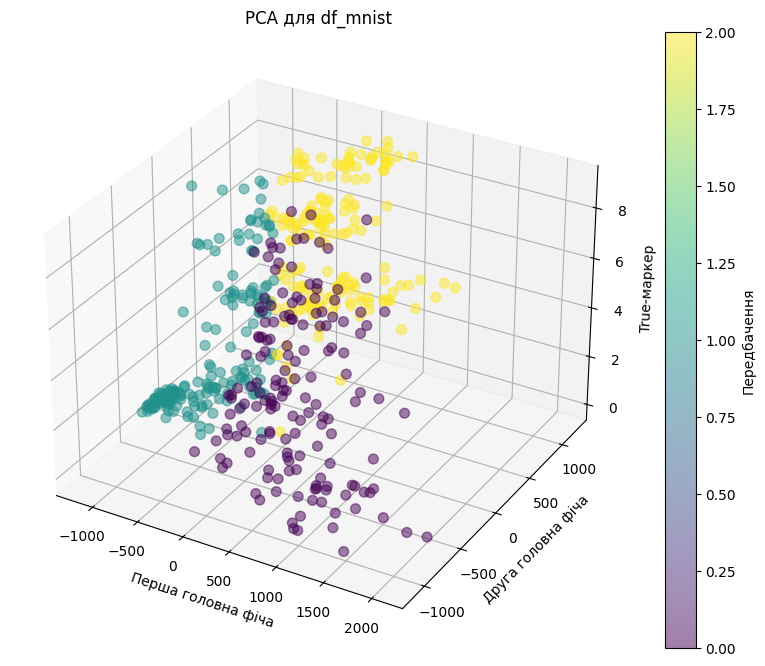

In [156]:
# Візуалізація в 3D порівняння кластеризації Kmeans з PCA і маркерів даних
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], df_mnist.iloc[:, 0], c=y_kmeans_PCA, cmap='viridis', s=50, alpha=0.5)

ax.set_xlabel('Перша головна фіча')
ax.set_ylabel('Друга головна фіча')
ax.set_zlabel('True-маркер')
fig.colorbar(scatter, ax=ax, label='Передбачення')
plt.title('PCA для df_mnist')

plt.show()